## Pandas Beyond DataFrames: Exploring its visualization Capabilities- Part 2


Whenever we think about visualization in Python, most of us immediately consider the Matplotlib library and Seaborn. Matplotlib and Seaborn are commonly used for visualization, while Pandas is typically associated with handling tabular data (DataFrames). But who would have thought about Pandas for visualization?

Let's embark on this second part of our journey to uncover the hidden gems of Pandas visualization

**Recap:** In Part 1, we derived a list of possible visualizations and explored techniques such as **Pie, Hexbin, Kernel Density Estimation, RadViz, and Scatter Matrix.**

In Part 2, we're taking the game to the next level. 
We'll visualize Time Series plots including **Lag plots and Autocorrelation plots**, as well as categorical plots like **Bootstrap plots, Parallel Coordinates, and Andrews Curves.**

### Loading  Data:
- **Categorical**: Iris dataset to maintain consistency with Part-1
- **Time series:** The data contains the number of air passengers travelled each month.

In [329]:
url_iris='https://raw.githubusercontent.com/pandas-dev/pandas/main/pandas/tests/io/data/csv/iris.csv'
df_iris=pd.read_csv(url_iris)
df_iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [327]:
url='https://raw.githubusercontent.com/RajasekharUmapathy/raj_test/master/AirPassengers.csv'
df_passenger=pd.read_csv(url)
df_passenger.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### Lag Plots :

Lag plot helps visualize the relationship between ***each value y(t) in the time series and its lagged value y(t+1)***. It helps to detect patterns such as autocorrelation or temporal dependencies in the data.

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

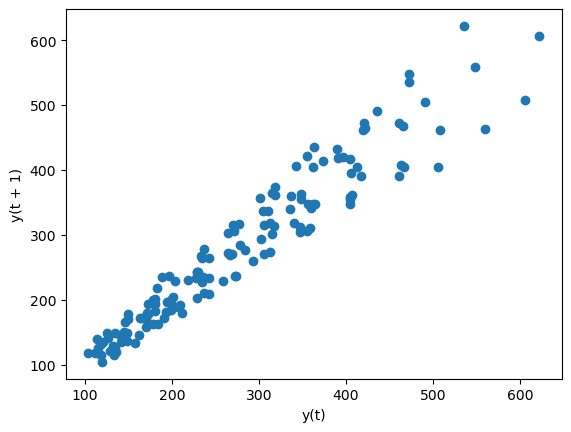

In [334]:
from pandas.plotting import lag_plot
lag_plot(df_passenger['#Passengers'])

If you're like me, who initially thought that every dataset would exhibit a linear pattern with its own lag, hold on a moment. Let's see how a lag plot of Sepal Length is going to look.

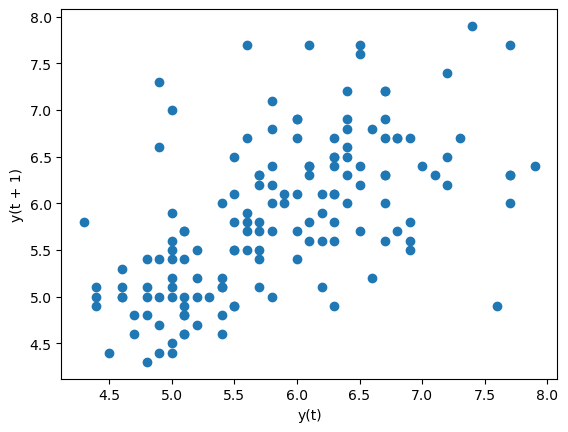

In [337]:
lag_plot(df_iris['SepalLength']);

Absolutely random! 
The *randomness* of the points in the lag plot indicates that *Sepal Length has **no autocorrelation***, suggesting that it may not be suitable for time series analysis. 

Conversely, datasets with a clear linear trend, such as Air Passengers, tend to exhibit positive autocorrelation, making them suitable for time series analysis. As it has a linear trend.

**Notes:**
- If the data shows a linear pattern, it suggests autocorrelation is present. A positive linear trend (i.e. going upwards from left to right) is suggestive of positive autocorrelation; a negative linear trend (going downwards from left to right) is suggestive of negative autocorrelation. 
- The tighter the data is clustered around the diagonal, the more autocorrelation is present; perfectly autocorrelated data will cluster in a single diagonal line.
- Random plots mean that there is no autocorrelation

### Autocorrelation Plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

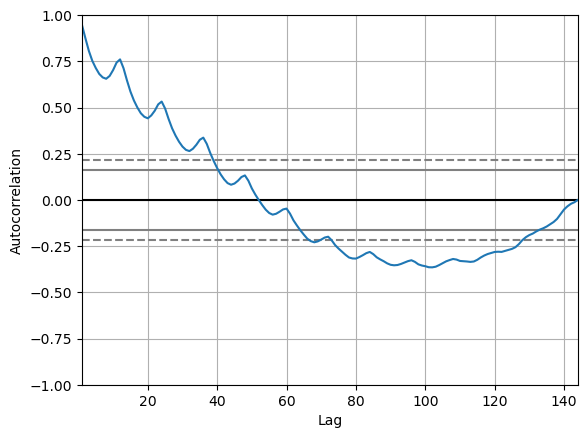

In [265]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_passenger['#Passengers'])

**Notes:** 
- Autocorrelation_plot (correlogram) is used for checking randomness in a data set. 
- The horizontal lines displayed in the plot correspond to 95% and the dashed line is 99% confidence band.- 
- If the time series is random, autocorrelations should be near zero for any and all time-lag separations. If non-random, then one or more of the autocorrelations will be significantly non-zero.
- Autocorrelations should be near-zero for randomness; if the analyst does not check for randomness, then the validity of many of the statistical conclusions becomes suspect. The correlogram is an excellent way of checking for such randomness.


### Bootstrap plot: 
It is a graphical method used to measure the uncertainty of any desired statistical characteristic of a population. It is an alternative to the confidence interval.

**Why we need Bootstrap Plot?**
Suppose, we have 5000 people in a park, and we need to find the average weight of the whole population. It is not feasible to measure the weight of each individual and then take an average of that. This is where bootstrap sampling comes into the picture.

What we do is, we take groups of 5 people randomly from the population and find its mean. We do the same process say 8-10 times. This way, we get a good estimate of the average weight of the population more efficiently. 

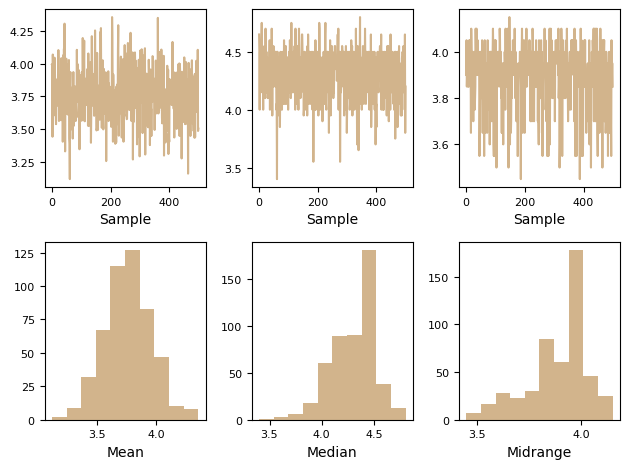

In [341]:
from pandas.plotting import bootstrap_plot
bootstrap_plot(df_iris['PetalLength'], size=50, samples=500, color="tan");

**Notes:**
- It is a non-parametric method, which means it does not require any assumptions about the underlying distribution of the data.
 - The bootstrap plot gives an estimation of the required information from the population, not the exact values.
- We can infer which sub-sample had the lowest variance, orwhich sub-sample creates the narrowest confidence interval, etc.
- It can be used to perform hypothesis tests and compare the distributions of different statistics.
 
**Disadvantage:** It can be computationally intensive, especially when working with large datasets.

### Parallel Coordinates plot:

Parallel coordinates plot visualizes the relationship between the four features (sepal length, sepal width, petal length, and petal width) across the three different species of iris flowers (setosa, versicolor, and virginica)

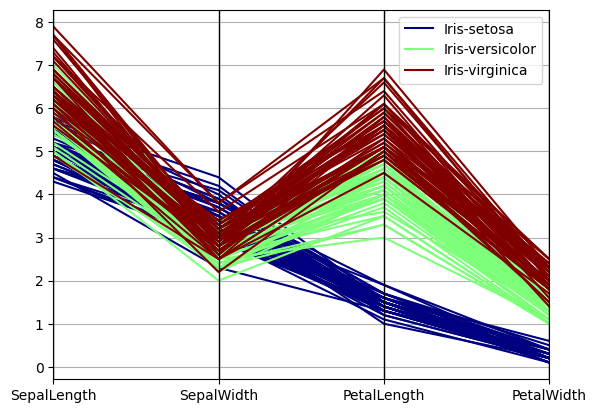

In [303]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(df_iris,"Name",colormap='jet');

**Notes:** Each line represents corresponding feature. Patterns, similarities, and differences between the species can be observed by examining the alignment and shape of the lines across the axes.

**Inference:** 
- We observe that setosa flowers generally have shorter petal length and petal width compared to versicolor and virginica flowers

- **Feauture Importance:** By examining the spread and distribution of the lines along the axes in the parallel coordinates plot, we can infer that petal length and petal width have larger variations and distinct patterns compared to sepal length and sepal width, indicating their higher importance in classification tasks.

### The Andrews curves plot:

It visualizes the multivariate data from the Iris dataset by transforming each observation into a Fourier series. Each curve represents an individual flower, and the shape of the curve reflects the values of the features. Patterns, similarities, and differences between the species can be observed by examining the shapes and trajectories of the curves

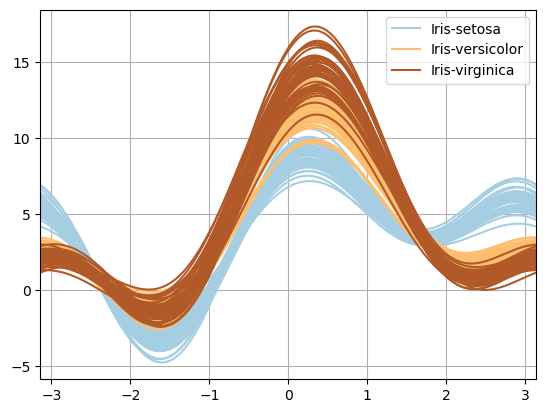

In [321]:
from pandas.plotting import andrews_curves
andrews_curves(df_iris, "Name",colormap='Paired');

**Inferences:**
- The curves for the setosa species are clearly separated from the curves for versicolor and virginica. This indicates that there are significant differences in the feature values between the setosa species and the other two species.
- The curves for versicolor and virginica species show some overlap, especially in the region of the plot where the curves are close together. This suggests that there may be similarities in the feature values between these two species.
- Andrews curves can be useful for clustering and classification tasks. By visually inspecting the curves, we can identify clusters or groups of similar observations and potentially use this information to classify new observations into the appropriate species

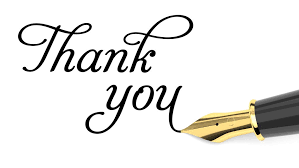